# Příklady nelineárních diskrétních map  s chaotickým chováním

In [1]:
#https://en.wikipedia.org/wiki/List_of_chaotic_maps

# Verhaulsteův diagram - interaktivní forma s využitím widgetů
## Logistická mapa, Gaussova mapa

In [2]:
#import knihoven
%matplotlib inline
import numpy as np
import scipy
import matplotlib.pylab as plt
import tkinter as tk

In [19]:
class Logistic(tk.Frame):
    """Computes and plots VH diagram using widgets to get input for Logistic function from user"""

    def __init__(self, master, controller):
        tk.Frame.__init__(self, master)
        self = tk.Toplevel()
        label = tk.Label(self, text="Logistic mapping")
        self.geometry("400x250")
        #label.pack()#pady=10, padx=10)
        self.grid()
        self.create_widgets()
 
    # Logistic equation
    def logistic_map(self, x, r):
        return x*r*(1.0-x)

    # Calculate points for Verhaulst diagram
    def get_VH_points(self, r, x=0.5, n=100):
        # Points will be stored in tuple
        # Initialization and first point 
        VH_points  = [(x,0)]
        for i in range(n):
            y1 = self.logistic_map(x,r)
            VH_points.append((x,y1))
            VH_points.append((y1,y1))
            y2 = self.logistic_map(y1,r)
            VH_points.append((y1,y2))
            x = y1
        return zip(*VH_points)

    # Calculate y-points from from logistic equation for x in range(0,1)
    def get_function_points(self, r, n =1000):
        "Gets n function points"
        x_vals = np.linspace(0,1,n)
        y_vals = [self.logistic_map(x,r) for x in x_vals]
        return x_vals, y_vals

    # Plotting Verhaulstes diagram 
    def plot_VH(self, r, function_n = 1000, VH_n = 100, VH_x = 0.5):
        """Plot Verhaulstes diagram for Logistic function"""
        plt.close()
        func_x_vals, func_y_vals = self.get_function_points(r=r, n=function_n)
        VH_x_vals, VH_y_vals = self.get_VH_points(r=r, x = VH_x, n = VH_n)
            
        fig, ax = plt.subplots(figsize = (6,6))
        diagonal_line = ax.plot((0,1), (0,1), color='gray', linewidth=1.35)
        function_line = ax.scatter(func_x_vals,func_y_vals, color= 'r', edgecolor='None', s=1.5)
        VH_line = ax.plot(VH_x_vals,VH_y_vals, color='b', linewidth=1)

        ax.set_ylim((0,1))
        ax.set_xlim((0,1))

        plt.show()
        
    def create_widgets(self):
        """Create a button, text and entry widgets"""

        #Place for question
        self.instruction = tk.Label(self,text = "Enter 'r' as a float for mapping")
        self.instruction.grid(row = 0, column = 0, columnspan = 2)

        #Place for users input
        self.parameter1 = tk.Entry(self)
        self.parameter1.grid(row = 0, column = 1)

        #Place for question
        self.instruction = tk.Label(self,text = "Enter 'function_n' as an integer")
        self.instruction.grid(row = 1, column = 0, columnspan = 2)

        #Place for users input
        self.parameter2 = tk.Entry(self)
        self.parameter2.grid(row = 1, column = 1)

        #Place for question
        self.instruction = tk.Label(self,text = "Enter 'VH_n' as an integer")
        self.instruction.grid(row = 2, column = 0, columnspan = 2)
        
        #Place for users input
        self.parameter3 = tk.Entry(self)
        self.parameter3.grid(row = 2, column = 1)
        
        #Place for question
        self.instruction = tk.Label(self,text = "Enter 'VH_x' as a float")
        self.instruction.grid(row = 3, column = 0, columnspan = 2)
        
        #Place for users input
        self.parameter4 = tk.Entry(self)
        self.parameter4.grid(row = 3, column = 1)

        #Place for submit,back and quit buttons
        self.submit_button = tk.Button(self, text = "Submit", command = self.reveal)
        self.submit_button.grid(row = 4, column = 0)

        self.back_button = tk.Button(self, text = "Back", command = lambda:controller.show_frame(Choice))
        self.back_button.grid(row = 4, column = 1)

        self.quit_button = tk.Button(self, text = "Quit", command = self.master.destroy)
        self.quit_button.grid(row = 4, column = 2)
        
        #Place for input confirmation or errors
        self.text = tk.Text(self, width = 80, height = 10)#, wrap = WORD)
        self.text.grid(row = 5, column = 0, columnspan = 2)

    def reveal(self):
        """Executes plot_VH if all parameters are real numbers"""
        
        try:
            par1 = float(self.parameter1.get())
            par2 = int(self.parameter2.get())
            par3 = int(self.parameter3.get())
            par4 = float(self.parameter4.get())
            message = "All parameters converted to numbers"
            print(par1, par2, par3, par4)
            self.plot_VH(par1, par2, par3, par4)
        except ValueError:
            message = "Not able to convert all parameters to numbers or a bad choice of a map"

In [21]:
class Gaussian(tk.Frame):
    """Computes and plots VH diagram using widgets to get input for Gaussian function from user"""
    
    def __init__(self, master, controller):
        tk.Frame.__init__(self, master)
        self = tk.Toplevel()
        label = tk.Label(self, text="Gaussian mapping")
        self.geometry("400x250")
        #label.pack()#pady=10, padx=10)
        self.grid()
        self.create_widgets()
    
    # Gauss mapping
    def gauss_map(self, x, alpha, beta):
        return (np.exp(-alpha*x**2)) + beta

    def get_VH_points_g(self, alpha , beta, x=0.5, n=100):
        # Initialization and first point 
        VH_points  = [(x,0)]
        for i in range(n):
            y1 = self.gauss_map(x, alpha, beta)
            VH_points.append((x,y1))
            VH_points.append((y1,y1))
            y2 = self.gauss_map(y1, alpha, beta)
            VH_points.append((y1,y2))
            x = y1

        return zip(*VH_points)

    # Calculate y-points from from gauss equation for x in range(0,1)
    def get_function_points_g(self, alpha, beta, n =1000):
        "Gets n function points"
        x_vals = np.linspace(0,1,n)
        y_vals = [self.gauss_map(x, alpha, beta) for x in x_vals]
        return x_vals, y_vals

    # Plotting Verhaulstes diagram 
    def plot_VH_g(self, alpha, beta, function_n = 1000, VH_n = 100, VH_x = 0.5):
        """Plot Verhaulstes diagram for Gaussian function"""
        plt.close()
        func_x_vals, func_y_vals = self.get_function_points_g(alpha=alpha, beta=beta, n=function_n)
        VH_x_vals, VH_y_vals = self.get_VH_points_g(alpha=alpha, beta=beta, x = VH_x, n = VH_n)
            
        fig, ax = plt.subplots(figsize = (6,6))
        diagonal_line = ax.plot((0,1), (0,1), color='gray', linewidth=1.35)
        function_line = ax.scatter(func_x_vals,func_y_vals, color= 'r', edgecolor='None', s=1.5)
        VH_line = ax.plot(VH_x_vals,VH_y_vals, color='b', linewidth=1)

        ax.set_ylim((0,1))
        ax.set_xlim((0,1))

        plt.show()

    def create_widgets(self):
        """Create a button, text and entry widgets"""

        #Place for question
        self.instruction = tk.Label(self,text = "Enter 'alpha' as a float for mapping")
        self.instruction.grid(row = 0, column = 0, columnspan = 2)

        #Place for users input
        self.parameter = tk.Entry(self)
        self.parameter.grid(row = 0, column = 1)

        #Place for question
        self.instruction = tk.Label(self,text = "Enter 'beta' as a float")
        self.instruction.grid(row = 1, column = 0, columnspan = 2)

        #Place for users input
        self.parameter1 = tk.Entry(self)
        self.parameter1.grid(row = 1, column = 1)

        #Place for question
        self.instruction = tk.Label(self,text = "Enter 'function_n' as an integer")
        self.instruction.grid(row = 2, column = 0, columnspan = 2)

        #Place for users input
        self.parameter2 = tk.Entry(self)
        self.parameter2.grid(row = 2, column = 1)

        #Place for question
        self.instruction = tk.Label(self,text = "Enter 'VH_n' as an integer")
        self.instruction.grid(row = 3, column = 0, columnspan = 2)
        
        #Place for users input
        self.parameter3 = tk.Entry(self)
        self.parameter3.grid(row = 3, column = 1)
        
        #Place for question
        self.instruction = tk.Label(self,text = "Enter 'VH_x' as a float")
        self.instruction.grid(row = 4, column = 0, columnspan = 2)
        
        #Place for users input
        self.parameter4 = tk.Entry(self)
        self.parameter4.grid(row = 4, column = 1)

        #Place for submit,back and quit buttons
        self.submit_button = tk.Button(self, text = "Submit", command = self.reveal)
        self.submit_button.grid(row = 5, column = 0)

        self.back_button = tk.Button(self, text = "Back", command = lambda:controller.show_frame(Choice))
        self.back_button.grid(row = 5, column = 1)

        self.quit_button = tk.Button(self, text = "Quit", command = self.master.destroy)
        self.quit_button.grid(row = 5, column = 2)
        
        #Place for input confirmation or errors
        self.text = tk.Text(self, width = 80, height = 10)#, wrap = WORD)
        self.text.grid(row = 6, column = 0, columnspan = 2)

    def reveal(self):
        """Executes plot_VH if all parameters are integers or real numbers"""
        
        try:
            par = float(self.parameter.get())
            par1 = float(self.parameter1.get())
            par2 = int(self.parameter2.get())
            par3 = int(self.parameter3.get())
            par4 = float(self.parameter4.get())
            message = "All parameters converted to numbers"
            print(par1, par2, par3, par4)
            self.plot_VH(par1, par2, par3, par4)
        except ValueError:
            message = "Not able to convert all parameters to numbers or a bad choice of a map"

In [27]:
# Widgety
class Choice(tk.Frame):
    """A frame providing choice of mapping type function using buttons"""
    
    def __init__(self, master, controller):
        tk.Frame.__init__(self, master)
        self = tk.Toplevel()
        #.geometry("400x250")
        #top.title("Choose funtion or die")
        #label = tk.Label(self, text="Choosing function")
        #label.pack()#pady = 10, padx = 10)
        
        log_button = tk.Button(self, text="Logistic function", command=lambda:controller.show_frame(Logistic))
        log_button.grid(row = 1, column = 0)
        gauss_button = tk.Button(self, text="Gauss function", command=lambda:controller.show_frame(Gaussian))
        gauss_button.grid(row = 2, column = 0)
        quit_button = tk.Button(self, text = "Quit", command = self.master.destroy)
        quit_button.grid(row = 3, column = 0)

In [ ]:
#Application using classes above
class Application(tk.Tk):
    """A GUI APPLICATION ON VERHAUSTEL DIAGRAMS with some inputs and SUBMIT button"""
    
    def __init__(self, *args, **kwargs):
        tk.Tk.__init__(self, *args, **kwargs)
        self.title("Interactive VH")
        #self.geometry("400x250")
        container = tk.Frame(self)
        
        container.pack(side = "top", fill = "both", expand = True)
        container.grid_rowconfigure(0, weight = 1)
        container.grid_columnconfigure(0, weight = 1)
        
        self.frames = {Choice: Choice, Logistic: Logistic, Gaussian: Gaussian}
        
        frame = Choice(container,self)
        self.frames[Choice] = frame
        frame.grid(row = 0, column = 0, sticky = "W")
        
        #for f in (Choice, Logistic, Gaussian):
        #    frame = f(container,self)
        #    self.frames[f] = frame
        #    frame.grid(row = 0, column = 0, sticky = "W")
            
        self.show_frame(Choice)
        
    def show_frame(self, cont):
        frame = self.frames[cont]
        #print(type(frame))
        frame.tkraise()
       
#root = Tk()
#root.title("Interactive VH")
#root.geometry("400x250")
app = Application()

app.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/olowathor/miniconda3/lib/python3.5/tkinter/__init__.py", line 1549, in __call__
    return self.func(*args)
TypeError: __init__() missing 2 required positional arguments: 'master' and 'controller'
Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/olowathor/miniconda3/lib/python3.5/tkinter/__init__.py", line 1549, in __call__
    return self.func(*args)
TypeError: __init__() missing 2 required positional arguments: 'master' and 'controller'


# Fraktály

In [7]:
#Původní Jirkův kod
def mandelbrot(rlim, ilim, n=100, d=1000):
    r, i = np.meshgrid(np.linspace(rlim[0], rlim[1], d), np.linspace(ilim[0], ilim[1], d))
    
    c = r+i*1j
    z = np.copy(c)
    fractal = np.ones_like(z, dtype=np.uint8) * 255
    for j in range(n):
        mask = abs(z) <= 10
        z[mask] *= z[mask]
        z[mask] += c[mask]
        fractal[(fractal == 255) & ~mask] = 254 * j/n
    return fractal

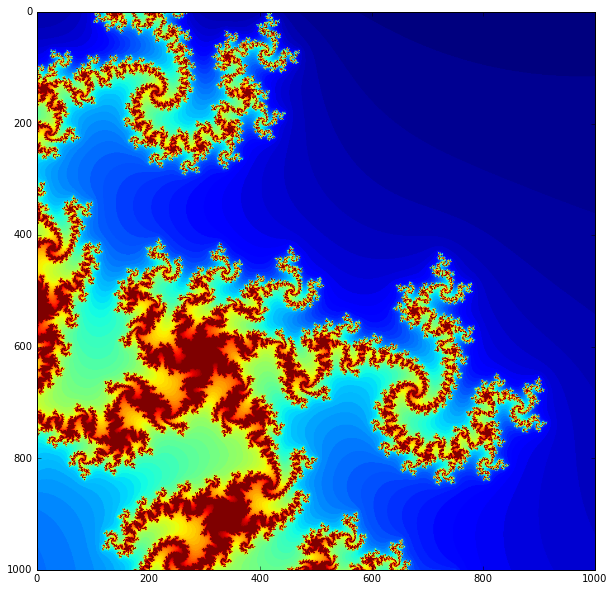

In [8]:
#Původní Jirkův kod
#%%timeit
plt.figure(figsize=(10,10))
plt.imshow(mandelbrot((-0.225, -0.2225), (-0.705, -0.7025)));

In [9]:
#můj kod - odzoomování mandelbrotovy množiny
rlim = (-0.225, -0.2225)
ilim = (-0.705, -0.7025)
real_size = abs(rlim[0]-rlim[1])
complex_size = abs(ilim[0]-ilim[1])

pictures = 37;
zoom_factor = 4;
translation_factor = 2;

powers = np.linspace(1,pictures,pictures)
inverted_powers = np.array((np.ones(pictures) / np.multiply(zoom_factor,powers)), dtype=float)
#print(powers)
#print(inverted_powers)
#print(sum((inverted_powers*real_size)[0:2]))

real_coo = [rlim]
complex_coo = [ilim]

for i in range(2,pictures+2):
    #print(inverted_powers[1:i])
    real_const = float(sum(inverted_powers[0:i]*real_size))/2
    complex_const = float(sum(inverted_powers[0:i]*complex_size))/2
    real_coo.append((rlim[0]+real_const,rlim[1]-real_const))
    complex_coo.append((ilim[0]+complex_const,ilim[1]-complex_const))
    #print(real_const)
    #print(real_coo)
    #print(abs(real_coo[i-2][0]-real_coo[i-2][1]),real_size)

for j in range(1,pictures,2):
    plt.figure(figsize=(10,10),dpi=100);
    #plt.plot(mandelbrot(real_coo[j], complex_coo[j]))
    #plt.imshow(mandelbrot(real_coo[j], complex_coo[j]))
    fname = 'mandelbrot_' + str(j) + '.png';
    plt.imsave(fname,mandelbrot(real_coo[j], complex_coo[j]));
    #plt.clf()

KeyboardInterrupt: 

In [ ]:
#from images2gif import writeGif
#from PIL import Image
#import Image
#import os

#file_names = sorted((fn for fn in os.listdir('.') if fn.endswith('.png')))

#images = [Image.open(fn) for fn in file_names]

#size = (1000,1000)
#for im in images:
#    im.thumbnail(size, Image.ANTIALIAS)

#print writeGif.__doc__

#filename = "mandelbrot.gif"
#writeGif(filename, images, duration=0.2)